<a id=top-page></a>
# `pykitPIV` demo: Image statistics

In this Jupyter notebook, we visualize the statistics of the generated PIV images.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#visualize-statistics">Visualize the particle statistics</a></li>
    <li><a href="#explore-statistics">Explore image statistics</a></li>
        <ul>
        <li><a href="#low-exposure">Statistics of low-exposure images</a></li>
        <li><a href="#high-exposure">Statistics of high-exposure images</a></li>
        </ul>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
from pykitPIV import Particle, Image

2025-05-23 13:26:14.516582: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
n_images = 100
image_size = (200,200)
size_buffer = 10
figsize = (6,3)

<a id=generate-particles></a>

***

## Generate particles

[Go to the top](#top-page)

In [4]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(1,4),
                     distances=(1,2),
                     densities=(0.05,0.1),
                     diameter_std=(0,0.2),
                     min_diameter=0.01,
                     seeding_mode='random', 
                     random_seed=100)

<a id=visualize-statistics></a>
***

## Visualize the particle statistics

[Go to the top](#top-page)

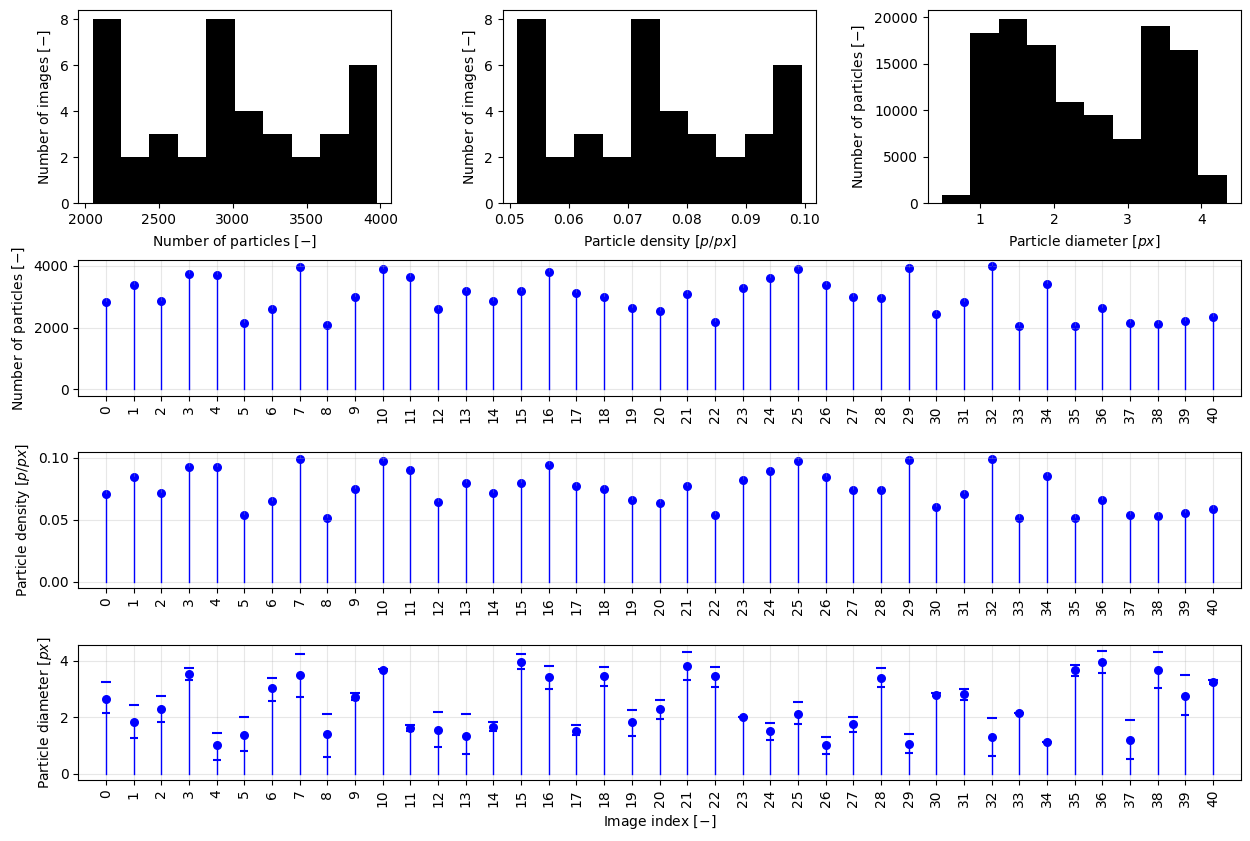

In [5]:
if save_images: filename = 'Particle_plot_properties.png'
particles.plot_properties(idx=(0,40),
                          c_hist='k',
                          c_scatter='b',
                          s=30,
                          figsize=(15,10),
                          dpi=300,
                          filename=filename);

<a id=explore-statistics></a>
***

## Explore image statistics

[Go to the top](#top-page)

In [6]:
image = Image(random_seed=100)

We add the generated particles to the image:

In [7]:
image.add_particles(particles)

<a id=low-exposure></a>

### Statistics of low-exposure images

[Go to the top](#top-page)

In [8]:
exposures = (0.1, 0.15)

In [9]:
image.add_reflected_light(exposures=exposures,
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

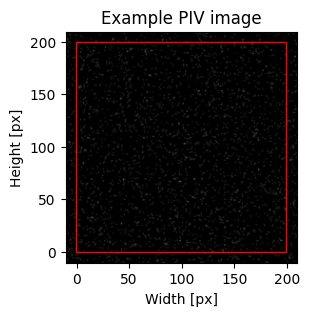

In [10]:
if save_images: filename = 'example-image-low-exposure.png'
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename=filename);

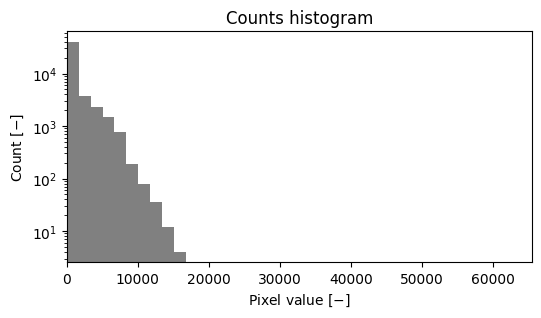

In [11]:
if save_images: filename = 'counts-histogram-low-exposure.png'
image.plot_image_histogram(image.images_I1[0], 
                           logscale=True,
                           color='grey',
                           xlabel='Pixel value [$-$]',
                           ylabel='Count [$-$]',
                           title='Counts histogram',
                           figsize=figsize,
                           filename=filename);

<a id=high-exposure></a>

### Statistics of high-exposure images

[Go to the top](#top-page)

In [12]:
exposures = (0.9, 0.95)

In [13]:
image.add_reflected_light(exposures=exposures,
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

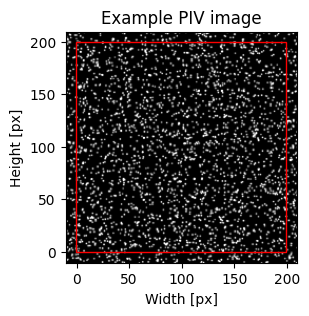

In [14]:
if save_images: filename = 'example-image-high-exposure.png'
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename=filename);

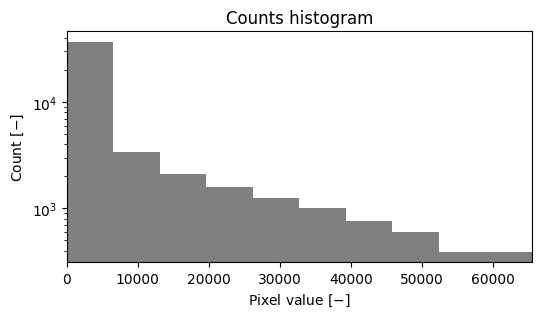

In [15]:
if save_images: filename = 'counts-histogram-high-exposure.png'
image.plot_image_histogram(image.images_I1[0], 
                           logscale=True,
                           color='grey',
                           xlabel='Pixel value [$-$]',
                           ylabel='Count [$-$]',
                           title='Counts histogram',
                           figsize=figsize,
                           filename=filename);

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)